# とりえあずデータみてみる

In [11]:
import pandas as pd

In [51]:
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

In [53]:
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3778807,1552434660,3857.21,3857.68,3857.21,3857.59,0.542492,2092.640913,3857.456219
3778808,1552434720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778809,1552434780,3857.59,3858.17,3857.59,3858.17,0.297396,1147.336872,3857.939815
3778810,1552434840,3858.17,3858.17,3858.17,3858.17,0.048400,186.735428,3858.170000
3778811,1552434900,3857.80,3860.09,3857.59,3860.09,20.372100,78591.965693,3857.823469
3778812,1552434960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778813,1552435020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778814,1552435080,3860.09,3861.05,3860.09,3861.05,0.378637,1461.770077,3860.606378
3778815,1552435140,3860.18,3860.18,3859.74,3859.74,1.056403,4077.863045,3860.139080
3778816,1552435200,3861.37,3862.01,3861.37,3861.95,0.198124,765.149137,3861.967464


In [54]:
df.shape

(3778817, 8)

# グラフをみる

In [55]:
from datetime import datetime
df["Timestamp_UTC"] = df["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df = df.set_index("Timestamp_UTC")

In [56]:
df = df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume_(BTC)": "volume"
})

In [57]:
import cufflinks as cf
cf.set_config_file(offline=True)
red = cf.get_scales("dflt")[4]
green = cf.get_scales("dflt")[2]

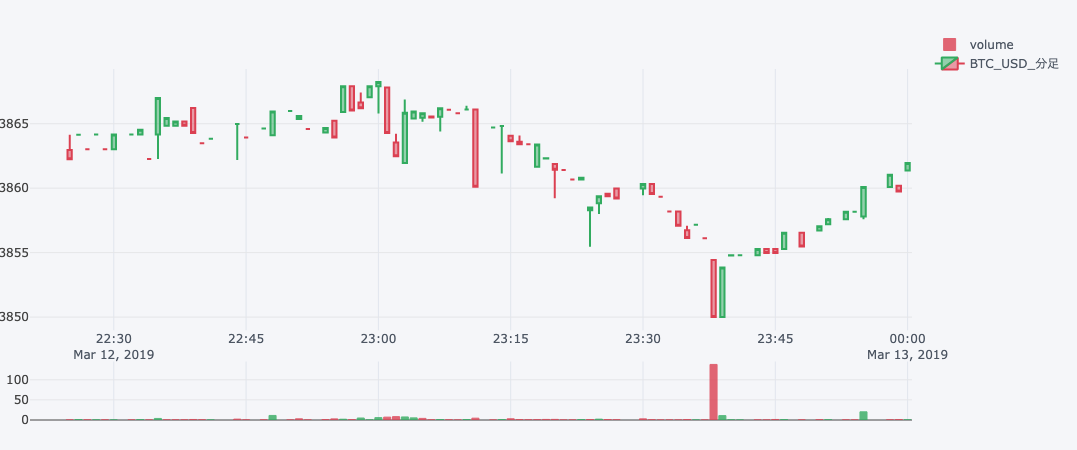

In [60]:
qf = cf.QuantFig(df.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_分足")

# １分毎は多すぎるので1日毎にする

In [62]:
how = {
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}
df_day = df.resample('D').agg(how)
df_day.tail(10)

,open,high,low,close,volume
Timestamp_UTC,,,,,
2019-03-04,3789.70,3806.90,3670.00,3698.66,7293.719628
2019-03-05,3698.65,3877.10,3690.00,3844.07,7280.823976
2019-03-06,3844.07,3895.12,3808.80,3851.55,6402.675075
2019-03-07,3851.26,3891.04,3826.13,3856.64,7964.508254
2019-03-08,3856.78,3924.37,3760.10,3844.64,7707.396670
2019-03-09,3841.27,3950.25,3835.66,3916.43,5125.898304
2019-03-10,3916.42,3916.43,3862.00,3897.92,3000.606719
2019-03-11,3898.14,3912.89,3812.64,3849.25,6612.115161
2019-03-12,3848.86,3877.69,3791.07,3859.74,5794.614734


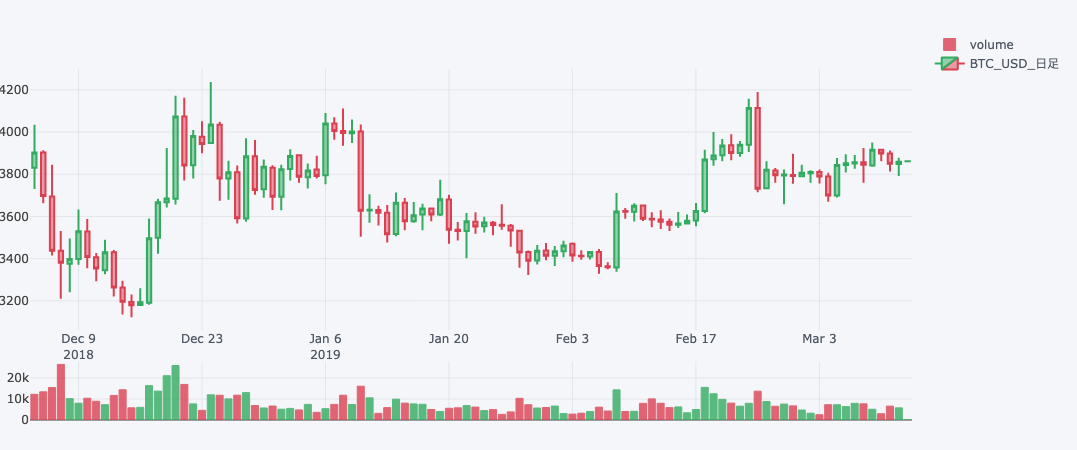

In [64]:
qf = cf.QuantFig(df_day.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_日足")

# 気になって調べたこと

- 時系列データの線形補完のやりかた
    - 今回は嘘のデータを混ぜたくないので使わない
    - [pandasで欠損値NaNを前後の値から補間するinterpolate | note.nkmk.me](https://note.nkmk.me/python-pandas-interpolate/)

```python
df.interpolate('time')
```

- OHLCデータは`cufflinks`ってやつ使うと簡単に描写できる
    - Open、High、Low、Closeのあるデータ、主に金融データ
    - [jupyter notebook上で金融データの描画・取得・操作 - Qiita](https://qiita.com/u1and0/items/6bc0dbeed0e20dd89eda)

- OHLCデータのタイムスタンプ単位は`resample`使うと簡単に変更できる

``` python
df.resample('H').agg(how)
```